In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r India_2019

In [5]:
India_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
8,8,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,100.00,...,201,4,3/68,50.25,7.17,42.0,0,0,0,0
47,47,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,88.88,...,615,25,4/55,24.60,4.62,31.8,1,0,2,0
54,54,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,52.27,...,815,29,6/42,28.10,5.73,29.3,1,1,8,0
55,55,DL Chahar (INDIA),2,1,1,6,6*,-,8,75.00,...,92,1,1/48,92.00,5.41,102.0,0,0,0,0
80,80,S Dhawan (INDIA),18,17,1,583,143,36.43,635,91.81,...,-,-,-,-,-,-,-,-,7,0
81,81,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,82.30,...,-,-,-,-,-,-,-,-,11,8
86,86,S Dube (INDIA),1,1,0,9,9,9.00,6,150.00,...,68,0,-,-,8.68,-,0,0,0,0
144,144,SS Iyer (INDIA),6,5,0,266,71,53.20,236,112.71,...,13,0,-,-,13.00,-,0,0,2,0
145,145,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,96.26,...,647,12,2/45,53.91,5.01,64.5,0,0,7,0
146,146,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,92.88,...,369,5,1/17,73.80,5.76,76.8,0,0,7,0


In [6]:
India_2019=India_2019.reset_index()

In [7]:
India_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,8,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,...,201,4,3/68,50.25,7.17,42.0,0,0,0,0
1,47,47,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,...,615,25,4/55,24.60,4.62,31.8,1,0,2,0
2,54,54,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,...,815,29,6/42,28.10,5.73,29.3,1,1,8,0
3,55,55,DL Chahar (INDIA),2,1,1,6,6*,-,8,...,92,1,1/48,92.00,5.41,102.0,0,0,0,0
4,80,80,S Dhawan (INDIA),18,17,1,583,143,36.43,635,...,-,-,-,-,-,-,-,-,7,0
5,81,81,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,...,-,-,-,-,-,-,-,-,11,8
6,86,86,S Dube (INDIA),1,1,0,9,9,9.00,6,...,68,0,-,-,8.68,-,0,0,0,0
7,144,144,SS Iyer (INDIA),6,5,0,266,71,53.20,236,...,13,0,-,-,13.00,-,0,0,2,0
8,145,145,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,...,647,12,2/45,53.91,5.01,64.5,0,0,7,0
9,146,146,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,...,369,5,1/17,73.80,5.76,76.8,0,0,7,0


In [8]:
India_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
India_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,100.00,0,...,201,4,3/68,50.25,7.17,42.0,0,0,0,0
1,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,88.88,0,...,615,25,4/55,24.60,4.62,31.8,1,0,2,0
2,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,52.27,0,...,815,29,6/42,28.10,5.73,29.3,1,1,8,0
3,DL Chahar (INDIA),2,1,1,6,6*,-,8,75.00,0,...,92,1,1/48,92.00,5.41,102.0,0,0,0,0
4,S Dhawan (INDIA),18,17,1,583,143,36.43,635,91.81,2,...,-,-,-,-,-,-,-,-,7,0
5,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,82.30,0,...,-,-,-,-,-,-,-,-,11,8
6,S Dube (INDIA),1,1,0,9,9,9.00,6,150.00,0,...,68,0,-,-,8.68,-,0,0,0,0
7,SS Iyer (INDIA),6,5,0,266,71,53.20,236,112.71,0,...,13,0,-,-,13.00,-,0,0,2,0
8,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,96.26,0,...,647,12,2/45,53.91,5.01,64.5,0,0,7,0
9,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,92.88,0,...,369,5,1/17,73.80,5.76,76.8,0,0,7,0


In [10]:
India_2019_players =India_2019.copy()

In [11]:
India_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
India_2019_players.HS=India_2019_players.HS.str.extract('(\d+)')
India_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
India_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,1,0,5,5,5.00,5,100.00,0,0,...,201,4,3/68,50.25,7.17,42.0,0,0,0,0
1,14,7,6,8,6,8.00,9,88.88,0,0,...,615,25,4/55,24.60,4.62,31.8,1,0,2,0
2,16,4,2,23,18,11.50,44,52.27,0,0,...,815,29,6/42,28.10,5.73,29.3,1,1,8,0
3,2,1,1,6,6,-,8,75.00,0,0,...,92,1,1/48,92.00,5.41,102.0,0,0,0,0
4,18,17,1,583,143,36.43,635,91.81,2,2,...,-,-,-,-,-,-,-,-,7,0
5,18,16,6,600,87,60.00,729,82.30,0,6,...,-,-,-,-,-,-,-,-,11,8
6,1,1,0,9,9,9.00,6,150.00,0,0,...,68,0,-,-,8.68,-,0,0,0,0
7,6,5,0,266,71,53.20,236,112.71,0,4,...,13,0,-,-,13.00,-,0,0,2,0
8,15,9,3,206,77,34.33,214,96.26,0,1,...,647,12,2/45,53.91,5.01,64.5,0,0,7,0
9,23,19,8,470,81,42.72,506,92.88,0,3,...,369,5,1/17,73.80,5.76,76.8,0,0,7,0


In [14]:
India_2019_players.replace("-",0,inplace=True)

In [15]:
India_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

India_2019_players_scaled = pd.DataFrame(scaler.fit_transform(India_2019_players),columns=India_2019_players.columns)
India_2019_players_scaled.shape
India_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.889924,-1.064605,-0.896293,-0.695051,-0.991869,-0.938052,-0.703360,0.224746,-0.377754,-0.632018,...,-0.478731,-0.193906,-0.329252,0.995933,0.831111,0.596424,-0.473050,-0.294884,-1.021397,-0.229044
1,0.204245,-0.245678,2.026401,-0.687408,-0.970474,-0.790218,-0.694017,0.005358,-0.377754,-0.632018,...,2.689341,1.004261,1.317009,0.043788,0.078079,0.240329,1.005231,-0.294884,-0.599332,-0.229044
2,0.447393,-0.655141,0.077939,-0.649196,-0.713735,-0.617746,-0.612264,-0.716923,-0.377754,-0.632018,...,-0.478731,1.583086,1.630583,0.173710,0.405869,0.153051,1.005231,3.391165,0.666863,-0.229044
3,-1.254647,-1.064605,-0.409177,-0.692503,-0.970474,-1.184441,-0.696353,-0.268481,-0.377754,-0.632018,...,0.225285,-0.509366,-0.564433,2.545721,0.311371,2.691099,-0.473050,-0.294884,-1.021397,-0.229044
4,0.690542,1.119200,-0.409177,0.777385,1.960632,0.610749,0.768203,0.063165,0.802727,0.297420,...,-0.478731,-0.775625,-0.642826,-0.869381,-1.286237,-0.869849,-0.473050,-0.294884,0.455830,-0.229044


In [17]:
India_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-3.552714e-17,-7.993606e-17,-6.217249e-17,8.881784e-17,-1.332268e-17,7.993606e-17,1.332268e-17,-1.065814e-16,6.661338e-17,-4.440892e-17,...,-8.437695e-17,6.883383e-17,-4.440892e-18,-6.217249e-17,3.153033e-16,-7.993606e-17,4.440892e-18,-5.329071e-17,0.000000,1.998401e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00
min,-1.376221e+00,-1.201092e+00,-8.962929e-01,-7.077880e-01,-1.098844e+00,-1.184441e+00,-7.150395e-01,-1.748162e+00,-3.777537e-01,-6.320183e-01,...,-4.787308e-01,-7.756253e-01,-6.428259e-01,-8.693811e-01,-1.286237e+00,-8.698488e-01,-4.730499e-01,-2.948839e-01,-1.021397,-2.290440e-01
25%,-8.899237e-01,-9.281169e-01,-8.962929e-01,-6.670285e-01,-9.062895e-01,-7.902185e-01,-6.940172e-01,-2.684812e-01,-3.777537e-01,-6.320183e-01,...,-4.787308e-01,-7.756253e-01,-6.428259e-01,-8.693811e-01,-1.286237e+00,-8.698488e-01,-4.730499e-01,-2.948839e-01,-0.810365,-2.290440e-01
50%,-3.890377e-02,-1.091902e-01,-4.091772e-01,-4.810635e-01,-1.146769e-01,-8.801011e-02,-4.580999e-01,5.358418e-03,-3.777537e-01,-6.320183e-01,...,-4.787308e-01,-5.556719e-01,-5.644325e-01,-2.896898e-02,2.966058e-01,1.340592e-02,-4.730499e-01,-2.948839e-01,-0.177267,-2.290440e-01
75%,6.905419e-01,3.002731e-01,7.793851e-02,6.918918e-02,6.341459e-01,6.107488e-01,5.110762e-02,1.529319e-01,-3.777537e-01,2.974204e-01,...,-1.267229e-01,8.364019e-01,2.978949e-01,6.072794e-01,4.265407e-01,5.964238e-01,-4.730499e-01,-2.948839e-01,0.455830,-2.290440e-01
max,1.906285e+00,2.484077e+00,3.000633e+00,3.087936e+00,2.302951e+00,1.772226e+00,3.155405e+00,3.841678e+00,3.753928e+00,2.621017e+00,...,3.041349e+00,2.436853e+00,2.649697e+00,2.545721e+00,2.552747e+00,2.691099e+00,2.483512e+00,3.391165e+00,3.410285,4.860822e+00


In [18]:
X =  India_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.88992373, -1.06460463, -0.89629288, -0.69505065, -0.99186928,
        -0.93805179, -0.70336047,  0.22474579, -0.37775373, -0.6320183 ,
        -1.02429504, -0.65227051, -0.65954618, -1.77059115, -0.88992373,
        -0.17466009, -0.32558367, -0.47873081, -0.19390633, -0.3292523 ,
         0.99593288,  0.83111053,  0.59642384, -0.47304992, -0.29488391,
        -1.02139713, -0.22904397],
       [ 0.20424479, -0.24567799,  2.02640129, -0.68740825, -0.97047435,
        -0.79021846, -0.69401721,  0.00535842, -0.37775373, -0.6320183 ,
         0.57616596, -0.67823669, -0.52439328, -1.3868778 ,  0.20424479,
         0.98117877,  1.26668017,  2.68934072,  1.00426115,  1.31700922,
         0.04378755,  0.07807903,  0.24032906,  1.00523107, -0.29488391,
        -0.5993322 , -0.22904397],
       [ 0.44739335, -0.65514131,  0.07793851, -0.64919626, -0.7137351 ,
        -0.61774623, -0.61226371, -0.7169232 , -0.37775373, -0.6320183 ,
         0.57616596, -0.57437196, -0.65954618, -1.3180

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(India_2019_players_scaled))

False

In [23]:
India_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.889924,-1.064605,-0.896293,-0.695051,-0.991869,-0.938052,-0.703360,0.224746,-0.377754,-0.632018,...,-0.478731,-0.193906,-0.329252,0.995933,0.831111,0.596424,-0.473050,-0.294884,-1.021397,-0.229044
1,0.204245,-0.245678,2.026401,-0.687408,-0.970474,-0.790218,-0.694017,0.005358,-0.377754,-0.632018,...,2.689341,1.004261,1.317009,0.043788,0.078079,0.240329,1.005231,-0.294884,-0.599332,-0.229044
2,0.447393,-0.655141,0.077939,-0.649196,-0.713735,-0.617746,-0.612264,-0.716923,-0.377754,-0.632018,...,-0.478731,1.583086,1.630583,0.173710,0.405869,0.153051,1.005231,3.391165,0.666863,-0.229044
3,-1.254647,-1.064605,-0.409177,-0.692503,-0.970474,-1.184441,-0.696353,-0.268481,-0.377754,-0.632018,...,0.225285,-0.509366,-0.564433,2.545721,0.311371,2.691099,-0.473050,-0.294884,-1.021397,-0.229044
4,0.690542,1.119200,-0.409177,0.777385,1.960632,0.610749,0.768203,0.063165,0.802727,0.297420,...,-0.478731,-0.775625,-0.642826,-0.869381,-1.286237,-0.869849,-0.473050,-0.294884,0.455830,-0.229044
5,0.690542,0.982712,2.026401,0.820692,0.762516,1.772226,0.987769,-0.124459,-0.377754,2.156298,...,-0.478731,-0.775625,-0.642826,-0.869381,-1.286237,-0.869849,-0.473050,-0.294884,1.299960,4.860822
6,-1.376221,-1.064605,-0.896293,-0.684861,-0.906290,-0.740941,-0.701025,1.211200,-0.377754,-0.632018,...,-0.478731,-0.578825,-0.642826,-0.869381,1.277023,-0.869849,-0.473050,-0.294884,-1.021397,-0.229044
7,-0.768349,-0.518654,-0.896293,-0.030162,0.420197,1.437137,-0.163787,0.475502,-0.377754,1.226859,...,-0.478731,-0.738002,-0.642826,-0.869381,2.552747,-0.869849,-0.473050,-0.294884,-0.599332,-0.229044
8,0.325819,0.027298,0.565054,-0.183010,0.548566,0.507265,-0.215175,0.150959,-0.377754,-0.167299,...,-0.126723,1.096873,0.297895,1.131795,0.193249,1.381927,-0.473050,-0.294884,0.455830,-0.229044
9,1.298413,1.392175,3.000633,0.489521,0.634146,0.920706,0.466883,0.084275,-0.377754,0.762140,...,-0.478731,0.292307,-0.250859,1.870125,0.414728,1.811335,-0.473050,-0.294884,0.455830,-0.229044


In [24]:
np.all(np.isfinite(India_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


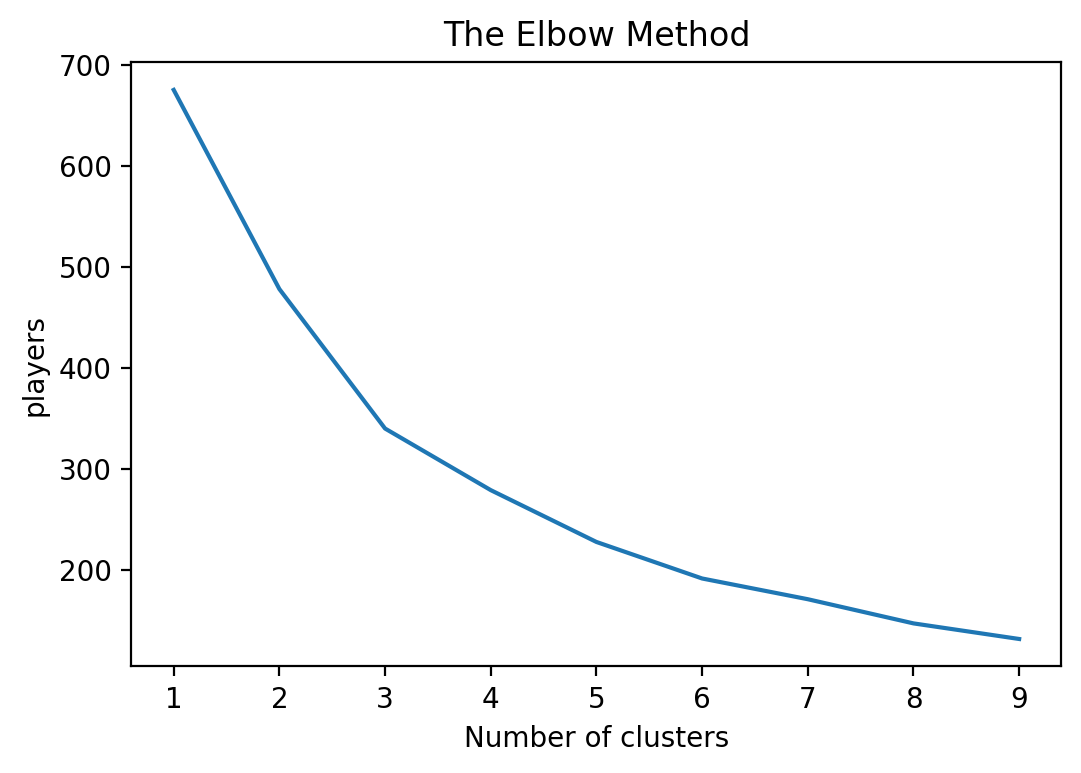

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1,
       0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 1.00663504,  1.47406794,  0.17536165,  1.64708968,  1.56696519,
         1.39032324,  1.69318524, -0.00600553,  1.51101493,  1.59863452,
         0.89625816,  1.62756032,  1.17853335,  0.00236131,  1.00663504,
        -0.8167928 , -0.75221896, -0.47873081, -0.77562533, -0.64282593,
        -0.86938107, -1.28623686, -0.86984877, -0.47304992, -0.29488391,
         1.04672103,  0.78892923],
       [-0.86966135, -0.67788927, -0.61214206, -0.45665028, -0.45343003,
        -0.41287387, -0.4670539 ,  0.09417216, -0.37775373, -0.39965863,
        -0.49080804, -0.4423772 , -0.31040118,  0.22996564, -0.86966135,
        -0.57064193, -0.58461224, -0.42006282, -0.5701425 , -0.55789974,
         0.00991493,  0.34483921, -0.0372154 , -0.47304992, -0.29488391,
        -0.56416012, -0.17602453],
       [ 0.67534512,  0.09554144,  0.80861205, -0.34445563, -0.2992082 ,
        -0.24964123, -0.35765992, -0.13750478, -0.37775373, -0.39965863,
         0.17605071, -0.35365941, -0.27098158, -0.3464

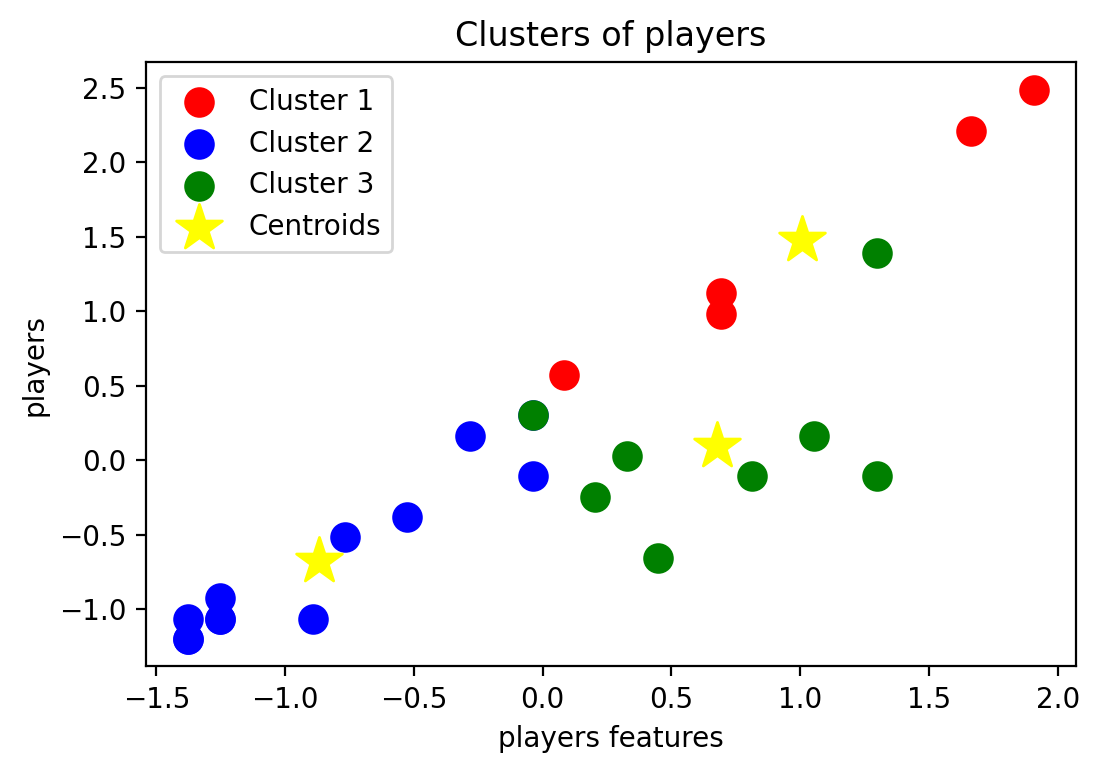

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
India_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,100.00,0,...,201,4,3/68,50.25,7.17,42.0,0,0,0,0
1,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,88.88,0,...,615,25,4/55,24.60,4.62,31.8,1,0,2,0
2,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,52.27,0,...,815,29,6/42,28.10,5.73,29.3,1,1,8,0
3,DL Chahar (INDIA),2,1,1,6,6*,-,8,75.00,0,...,92,1,1/48,92.00,5.41,102.0,0,0,0,0
4,S Dhawan (INDIA),18,17,1,583,143,36.43,635,91.81,2,...,-,-,-,-,-,-,-,-,7,0
5,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,82.30,0,...,-,-,-,-,-,-,-,-,11,8
6,S Dube (INDIA),1,1,0,9,9,9.00,6,150.00,0,...,68,0,-,-,8.68,-,0,0,0,0
7,SS Iyer (INDIA),6,5,0,266,71,53.20,236,112.71,0,...,13,0,-,-,13.00,-,0,0,2,0
8,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,96.26,0,...,647,12,2/45,53.91,5.01,64.5,0,0,7,0
9,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,92.88,0,...,369,5,1/17,73.80,5.76,76.8,0,0,7,0


In [31]:
India_2019["cluster"] = y_kmeans

In [32]:
India_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,100.00,0,...,4,3/68,50.25,7.17,42.0,0,0,0,0,1
1,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,88.88,0,...,25,4/55,24.60,4.62,31.8,1,0,2,0,2
2,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,52.27,0,...,29,6/42,28.10,5.73,29.3,1,1,8,0,2
3,DL Chahar (INDIA),2,1,1,6,6*,-,8,75.00,0,...,1,1/48,92.00,5.41,102.0,0,0,0,0,1
4,S Dhawan (INDIA),18,17,1,583,143,36.43,635,91.81,2,...,-,-,-,-,-,-,-,7,0,0
5,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,82.30,0,...,-,-,-,-,-,-,-,11,8,0
6,S Dube (INDIA),1,1,0,9,9,9.00,6,150.00,0,...,0,-,-,8.68,-,0,0,0,0,1
7,SS Iyer (INDIA),6,5,0,266,71,53.20,236,112.71,0,...,0,-,-,13.00,-,0,0,2,0,1
8,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,96.26,0,...,12,2/45,53.91,5.01,64.5,0,0,7,0,2
9,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,92.88,0,...,5,1/17,73.80,5.76,76.8,0,0,7,0,2


In [33]:
India_2019['cluster'].value_counts()

1    12
2     8
0     5
Name: cluster, dtype: int64

In [34]:
India_Cluster_2019 = np.array([5,12,8])

In [35]:
India_Cluster_2019

array([ 5, 12,  8])

In [36]:
%store India_Cluster_2019

Stored 'India_Cluster_2019' (ndarray)


In [37]:
India_2019_players_scaled.insert(0, 'Player', India_2019.Player)

In [38]:
India_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),-0.889924,-1.064605,-0.896293,-0.695051,-0.991869,-0.938052,-0.703360,0.224746,-0.377754,...,-0.478731,-0.193906,-0.329252,0.995933,0.831111,0.596424,-0.473050,-0.294884,-1.021397,-0.229044
1,JJ Bumrah (INDIA),0.204245,-0.245678,2.026401,-0.687408,-0.970474,-0.790218,-0.694017,0.005358,-0.377754,...,2.689341,1.004261,1.317009,0.043788,0.078079,0.240329,1.005231,-0.294884,-0.599332,-0.229044
2,YS Chahal (INDIA),0.447393,-0.655141,0.077939,-0.649196,-0.713735,-0.617746,-0.612264,-0.716923,-0.377754,...,-0.478731,1.583086,1.630583,0.173710,0.405869,0.153051,1.005231,3.391165,0.666863,-0.229044
3,DL Chahar (INDIA),-1.254647,-1.064605,-0.409177,-0.692503,-0.970474,-1.184441,-0.696353,-0.268481,-0.377754,...,0.225285,-0.509366,-0.564433,2.545721,0.311371,2.691099,-0.473050,-0.294884,-1.021397,-0.229044
4,S Dhawan (INDIA),0.690542,1.119200,-0.409177,0.777385,1.960632,0.610749,0.768203,0.063165,0.802727,...,-0.478731,-0.775625,-0.642826,-0.869381,-1.286237,-0.869849,-0.473050,-0.294884,0.455830,-0.229044
5,MS Dhoni (INDIA),0.690542,0.982712,2.026401,0.820692,0.762516,1.772226,0.987769,-0.124459,-0.377754,...,-0.478731,-0.775625,-0.642826,-0.869381,-1.286237,-0.869849,-0.473050,-0.294884,1.299960,4.860822
6,S Dube (INDIA),-1.376221,-1.064605,-0.896293,-0.684861,-0.906290,-0.740941,-0.701025,1.211200,-0.377754,...,-0.478731,-0.578825,-0.642826,-0.869381,1.277023,-0.869849,-0.473050,-0.294884,-1.021397,-0.229044
7,SS Iyer (INDIA),-0.768349,-0.518654,-0.896293,-0.030162,0.420197,1.437137,-0.163787,0.475502,-0.377754,...,-0.478731,-0.738002,-0.642826,-0.869381,2.552747,-0.869849,-0.473050,-0.294884,-0.599332,-0.229044
8,RA Jadeja (INDIA),0.325819,0.027298,0.565054,-0.183010,0.548566,0.507265,-0.215175,0.150959,-0.377754,...,-0.126723,1.096873,0.297895,1.131795,0.193249,1.381927,-0.473050,-0.294884,0.455830,-0.229044
9,KM Jadhav (INDIA),1.298413,1.392175,3.000633,0.489521,0.634146,0.920706,0.466883,0.084275,-0.377754,...,-0.478731,0.292307,-0.250859,1.870125,0.414728,1.811335,-0.473050,-0.294884,0.455830,-0.229044


In [39]:
India_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,KK Ahmed (INDIA),-0.938052,0.995933
1,JJ Bumrah (INDIA),-0.790218,0.043788
2,YS Chahal (INDIA),-0.617746,0.173710
3,DL Chahar (INDIA),-1.184441,2.545721
4,S Dhawan (INDIA),0.610749,-0.869381
5,MS Dhoni (INDIA),1.772226,-0.869381
6,S Dube (INDIA),-0.740941,-0.869381
7,SS Iyer (INDIA),1.437137,-0.869381
8,RA Jadeja (INDIA),0.507265,1.131795
9,KM Jadhav (INDIA),0.920706,1.870125


In [40]:
India_2019_Ave=India_2019_players_scaled.mean()

In [41]:
India_2019_Ave

Mat_x          -3.552714e-17
Inns_x         -7.993606e-17
NO             -6.217249e-17
Runs_x          8.881784e-17
HS             -1.332268e-17
Ave_x           7.993606e-17
BF              1.332268e-17
SR_x           -1.065814e-16
100             6.661338e-17
50             -4.440892e-17
0              -3.552714e-17
4s             -1.776357e-17
6s              8.881784e-18
Unnamed: 0_y   -1.953993e-16
Mat_y          -3.552714e-17
Inns_y         -1.776357e-17
Overs          -5.329071e-17
Mdns           -8.437695e-17
Runs_y          6.883383e-17
Wkts           -4.440892e-18
Ave_y          -6.217249e-17
Econ            3.153033e-16
SR_y           -7.993606e-17
4               4.440892e-18
5              -5.329071e-17
Ct              0.000000e+00
St              1.998401e-17
dtype: float64

In [42]:
India_Ave_2019 =India_2019_Ave[['Ave_x','Ave_y']]

In [43]:
India_Ave_2019

Ave_x    7.993606e-17
Ave_y   -6.217249e-17
dtype: float64

In [44]:
India_Ave_2019 = np.array([India_Ave_2019.Ave_x, India_Ave_2019.Ave_y])

In [45]:
India_Ave_2019

array([ 7.99360578e-17, -6.21724894e-17])

In [46]:
%store India_Ave_2019

Stored 'India_Ave_2019' (ndarray)


In [47]:
India_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KK Ahmed (INDIA),5,1,0,5,5,5.00,5,100.00,0,...,4,3/68,50.25,7.17,42.0,0,0,0,0,1
1,JJ Bumrah (INDIA),14,7,6,8,6*,8.00,9,88.88,0,...,25,4/55,24.60,4.62,31.8,1,0,2,0,2
2,YS Chahal (INDIA),16,4,2,23,18*,11.50,44,52.27,0,...,29,6/42,28.10,5.73,29.3,1,1,8,0,2
3,DL Chahar (INDIA),2,1,1,6,6*,-,8,75.00,0,...,1,1/48,92.00,5.41,102.0,0,0,0,0,1
4,S Dhawan (INDIA),18,17,1,583,143,36.43,635,91.81,2,...,-,-,-,-,-,-,-,7,0,0
5,MS Dhoni (INDIA),18,16,6,600,87*,60.00,729,82.30,0,...,-,-,-,-,-,-,-,11,8,0
6,S Dube (INDIA),1,1,0,9,9,9.00,6,150.00,0,...,0,-,-,8.68,-,0,0,0,0,1
7,SS Iyer (INDIA),6,5,0,266,71,53.20,236,112.71,0,...,0,-,-,13.00,-,0,0,2,0,1
8,RA Jadeja (INDIA),15,9,3,206,77,34.33,214,96.26,0,...,12,2/45,53.91,5.01,64.5,0,0,7,0,2
9,KM Jadhav (INDIA),23,19,8,470,81*,42.72,506,92.88,0,...,5,1/17,73.80,5.76,76.8,0,0,7,0,2
